Preprocessing Titanic Dataset (titanic.csv)

In [ ]:
import pandas as pd
import seaborn as sns

Load and Clean the Titanic Dataset

Load the Titanic dataset using pandas 

In [ ]:
df_titanic = pd.read_csv("dataset/titanic.csv")


Drop the following columns (in one line using a list):
['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck', 'embarked', 'class']

In [ ]:
print("Before Dropping Columns:")
df_titanic.head()


Before Dropping Columns:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.drop(
    ['PassengerId', 'Name', 'Ticket', 'Cabin'], 
    axis=1, 
    inplace=True
)


After Dropping Columns:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
print("\nAfter Dropping Columns:")
df_titanic.head()


After Dropping Columns:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

Handle Categorical and Missing Values

Encode the 'sex' column using LabelEncoder

In [ ]:
le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

print(df_titanic[['Sex']].head())

   Sex
0    1
1    0
2    0
3    0
4    1


Fill missing:

 Numerical values (e.g., age) with mean

In [ ]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())


 Categorical values (e.g., embarked) with mode

In [ ]:
for col in df_titanic.select_dtypes(include='object').columns:
    df_titanic[col] = df_titanic[col].fillna(df_titanic[col].mode()[0])


In [ ]:
print("After Handling Missing Values:")
df_titanic.info()


After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
import matplotlib.pyplot as plt

Visualize the Cleaned Titanic Data

Plot a histogram of fare

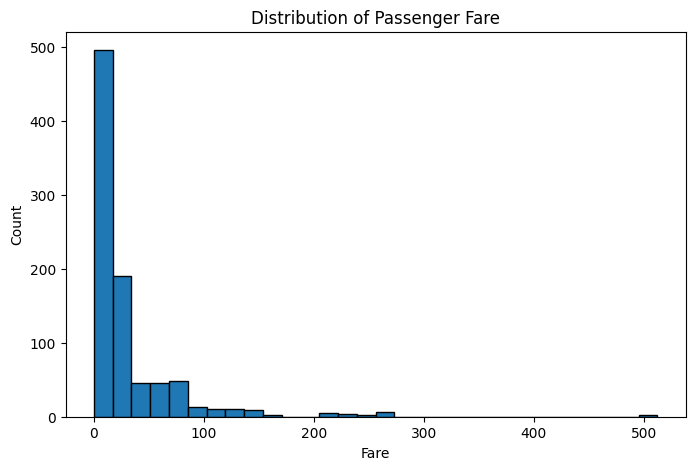

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_titanic['Fare'], bins=30, edgecolor='black')
plt.title("Distribution of Passenger Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


Plot a pie chart of passenger survival status (survived column)

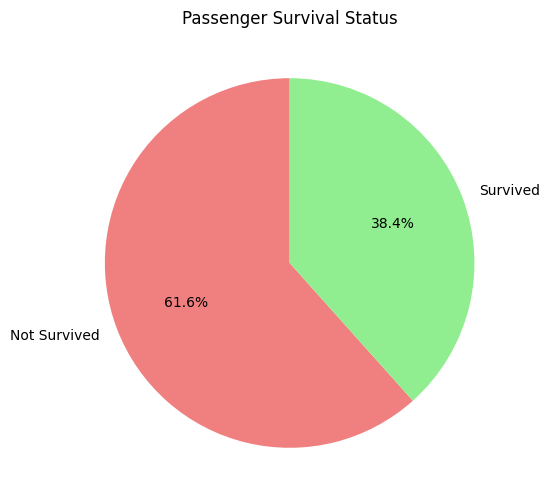

In [ ]:
plt.figure(figsize=(6,6))
df_titanic['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=["Not Survived", "Survived"],
    colors=['lightcoral','lightgreen']
)
plt.title("Passenger Survival Status")
plt.ylabel("")
plt.show()



Feature Scaling and Splitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Apply MinMaxScaler or StandardScaler to scale numerical features
Separate:
o X = all features except survived
o y = survived

In [ ]:
X = df_titanic.drop("Survived", axis=1)
y = df_titanic["Survived"]

In [ ]:
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[X.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(
    X[X.select_dtypes(include=['int64', 'float64']).columns]
)


Use train_test_split() to split data into 80% training and 20% testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 7)
Testing set shape: (179, 7)
